# project Data Science Methodology


### 📋 Variable description

`Customer_id` = unique customer id

`Age` = customer's age

`Gender` = 0: Male, 1: Female

`Revenue_Total` = total sales by customer

`N_Purchases` = number of purchases to date

`Purchase_DATE` = date latest purchase, dd.mm.yy

`Purchase_VALUE` = latest purchase in €

`Pay_Method` = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

`Time_Spent` = time spent (in sec) on website

`Browser` = 0: Chrome, 1: Safari, 2: Edge, 3: Other

`Newsletter` = 0: not subscribed, 1: subscribed

`Voucher` = 0: not used, 1: used

### 📚 Imports

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from datetime import datetime
from matplotlib.ticker import FuncFormatter

### 📖 Data

In [190]:
df = pd.read_csv('C:/Users/ZBOOK STUDIO G5/Desktop/CS/Semester 3/Data Science Methodology/project-1/Online Shop Customer Sales Data.csv')

In [191]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308.0,53.0,0.0,45.3,2.0,22.06.21,24.915,1.0,885.0,0.0,0.0,0.0
1,504309.0,18.0,1.0,36.2,3.0,10.12.21,2.896,2.0,656.0,0.0,0.0,1.0
2,504310.0,52.0,1.0,10.6,1.0,14.03.21,10.600,0.0,761.0,0.0,1.0,0.0
3,504311.0,29.0,0.0,54.1,5.0,25.10.21,43.280,1.0,906.0,0.0,1.0,0.0
4,504312.0,21.0,1.0,56.9,1.0,14.09.21,56.900,1.0,605.0,0.0,1.0,0.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65862 entries, 0 to 65861
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65853 non-null  float64
 1   Age             65850 non-null  float64
 2   Gender          65852 non-null  float64
 3   Revenue_Total   65853 non-null  float64
 4   N_Purchases     65847 non-null  float64
 5   Purchase_DATE   65843 non-null  object 
 6   Purchase_VALUE  65849 non-null  float64
 7   Pay_Method      65850 non-null  float64
 8   Time_Spent      65849 non-null  float64
 9   Browser         65852 non-null  float64
 10  Newsletter      65844 non-null  float64
 11  Voucher         65850 non-null  float64
dtypes: float64(11), object(1)
memory usage: 6.0+ MB


In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65853.0,537203.550529,18993.604793,504308.000,520755.000,537203.000,553652.00,570103.0
Age,65850.0,39.590767,13.825623,16.000,28.000,40.000,51.00,63.0
Gender,65852.0,0.671506,0.469669,0.000,0.000,1.000,1.00,1.0
Revenue_Total,65853.0,27.734806,14.941188,0.500,15.300,30.100,37.60,59.9
N_Purchases,65847.0,3.992559,2.004355,1.000,2.000,4.000,6.00,7.0
Purchase_VALUE,65849.0,15.969669,13.229682,0.005,4.823,12.642,24.75,59.9
Pay_Method,65850.0,1.308702,1.081928,0.000,0.000,1.000,2.00,3.0
Time_Spent,65849.0,598.906225,277.847649,120.000,358.000,598.000,840.00,1080.0
Browser,65852.0,0.630839,0.996308,0.000,0.000,0.000,1.00,3.0
Newsletter,65844.0,0.150948,0.358001,0.000,0.000,0.000,0.00,1.0


In [194]:
# Checking null values
df.isna().sum()

Customer_id        9
Age               12
Gender            10
Revenue_Total      9
N_Purchases       15
Purchase_DATE     19
Purchase_VALUE    13
Pay_Method        12
Time_Spent        13
Browser           10
Newsletter        18
Voucher           12
dtype: int64

In [195]:
# Drop rows with any missing value
df = df.dropna()

In [196]:
# Checking null values
df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [197]:
df.duplicated().sum()

66

In [198]:
print(f"DataFrame shape befor  dropping duplicates: {df.shape}")
# Drop duplicate rows
df = df.drop_duplicates()
print(f"DataFrame shape after dropping duplicates: {df.shape}")
print(f"Number of Duplicated : {df.duplicated().sum()}")

DataFrame shape befor  dropping duplicates: (65762, 12)
DataFrame shape after dropping duplicates: (65696, 12)
Number of Duplicated : 0


In [199]:
# Random sampling

proportion_sample = 0.1

# Calculate the sample size based on the proportion
sample_size = int(len(df) * proportion_sample)

# Perform random sampling based on the sample size
sample = df.sample(n=sample_size, random_state=0)

# Display the sample
print(sample)

       Customer_id   Age  Gender  Revenue_Total  N_Purchases Purchase_DATE  \
63186     567494.0  53.0     0.0           34.6          7.0      14.01.21   
59879     564187.0  17.0     1.0           32.1          3.0      02.03.21   
54359     558667.0  44.0     1.0           41.3          7.0      24.05.21   
38254     542562.0  63.0     1.0           13.9          7.0      17.08.21   
2289      506597.0  54.0     1.0           47.3          2.0      14.11.21   
...            ...   ...     ...            ...          ...           ...   
5754      510062.0  31.0     1.0           12.5          1.0      10.01.21   
49314     553622.0  45.0     0.0           50.1          2.0      01.05.21   
41364     545672.0  48.0     1.0           30.0          7.0      13.06.21   
31870     536178.0  52.0     1.0           35.7          2.0      29.12.21   
59674     563982.0  38.0     1.0           19.2          5.0      19.07.21   

       Purchase_VALUE  Pay_Method  Time_Spent  Browser  Newslet

In [200]:
# Drop Customer_id
df.drop('Customer_id', axis = 1, inplace = True)

# Splitting the date into month and year
df['day']= df['Purchase_DATE'].str.split('.').str[0]
df['month'] = df['Purchase_DATE'].str.split('.').str[1]
df['year'] = df['Purchase_DATE'].str.split('.').str[2]

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Drop Purchase_DATE
df.drop('Purchase_DATE', axis = 1, inplace = True)

In [201]:
df.head()

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day,month,year
0,53.0,0.0,45.3,2.0,24.915,1.0,885.0,0.0,0.0,0.0,22,6,21
1,18.0,1.0,36.2,3.0,2.896,2.0,656.0,0.0,0.0,1.0,10,12,21
2,52.0,1.0,10.6,1.0,10.600,0.0,761.0,0.0,1.0,0.0,14,3,21
3,29.0,0.0,54.1,5.0,43.280,1.0,906.0,0.0,1.0,0.0,25,10,21
4,21.0,1.0,56.9,1.0,56.900,1.0,605.0,0.0,1.0,0.0,14,9,21


### ❓ 1. What are the outlier of total revenue and the Purchase value

### 🔎 Boxplot for Identifying and excluding outliers

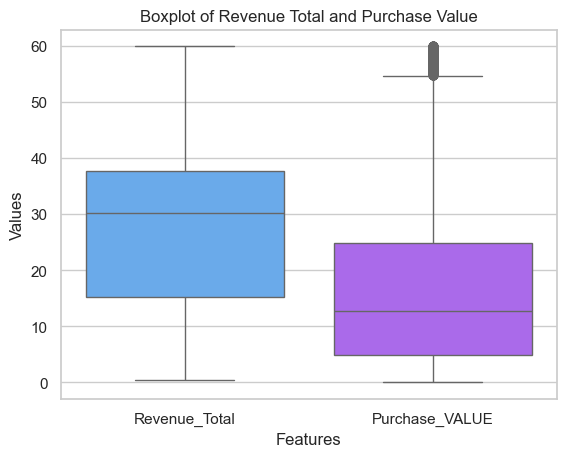

In [202]:
# Create the boxplot
sns.boxplot(data = df[['Revenue_Total', 'Purchase_VALUE']], palette = 'cool')

# Set the title/labels
plt.title('Boxplot of Revenue Total and Purchase Value')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

    From this graph, The insights are the following:
    - The distribution of values ​​in both 'Revenue_Total' and 'Purchase_VALUE' and how far the data reaches.
    - The mean value for the total revenue is 30 while the mean of the last purchase is 16
    - The standard deviation of the total revenue spent is 15 while for the last purchase is 13
    - Identify the presence of outliers that fall outside the range of the whiskers.
    - Note that 'Revenue_Total' has a wide range with logical outliers, while 'Purchase_VALUE' has more outliers.
    - This links me in making a decision about the outliers whether to remove them or completely.

----------------------

### ❓ 2.which method of payment is common?

### 🌳 payment methods treemap

In [203]:
payment_method_mapping = {
    0: 'Digital',
    1: 'Card',
    2: 'PayPal',
    3: 'Other'
}
## NOTE: The map() function replaces the numeric values in the Pay_Method column with the corresponding values from the dictionary.
df['Pay_Method']=df['Pay_Method'].map(payment_method_mapping)
payment_count = df.groupby('Pay_Method').size().reset_index(name='Count')
payment_count

,Pay_Method,Count
0,Card,19725
1,Digital,19046
2,Other,12398
3,PayPal,14527


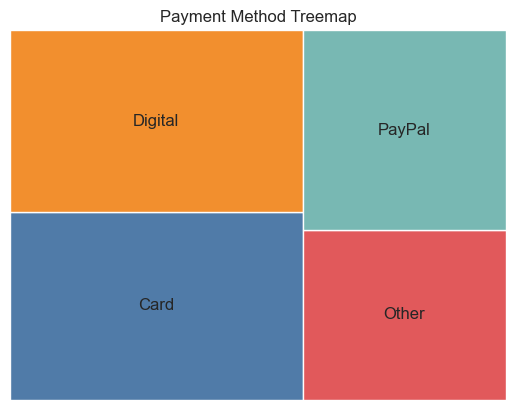

In [204]:

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']
squarify.plot(sizes=payment_count['Count'],label=payment_count['Pay_Method'], alpha=0.99, color= colors)
plt.axis('off')
plt.title('Payment Method Treemap')
plt.show()

### Insight:
    From the graph, the two most common payment methods are Digital wallets and cards. The website can increase 
    partnerships with digital companies to leverage this trend. so the digital companies can market to the websites by 
    making offers for the website products to the card users.

------------------------

### ❓ 3. What is the relationship between the age and the number of purchases?

### ✨ Age-revenue Scatter plot

Text(0, 0.5, 'Average N_Purchases')

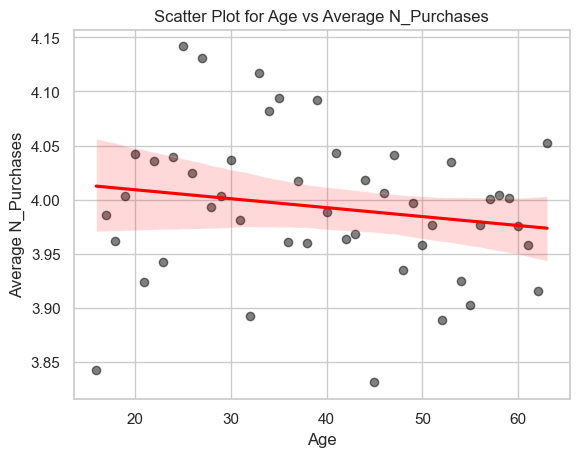

In [205]:
grouped_data = df.groupby('Age')['N_Purchases'].mean().reset_index()
sns.regplot(x='Age', y='N_Purchases', data=grouped_data, scatter_kws={'alpha':0.5 , 'color': 'black'}, line_kws={'color':'red'})
plt.title('Scatter Plot for Age vs Average N_Purchases')
plt.xlabel('Age')
plt.ylabel('Average N_Purchases')

### Insights:
    From the red line,  there is a slight negative relationship between age and the average number of purchases.
    People aged 20 to 40 tend to make more purchases. For this age group, special offers can be provided on 
    the websites and promotions to further increase their purchases. More products can be offered to this age range.Additionally, the reasons 
    can be analyzed behind the decline in purchasing activity as age increases.

---------------------------------

### ❓ 4.What is the Flow of Revenue Total Through the Year?

### ⏰ bar chart monthly revenue

In [206]:
months_mapping ={
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'Septemper',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['Month']= df["month"].map(months_mapping)
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}
df['Month_Order'] = df['Month'].map(month_order)
grouped_months = df.groupby(['Month', 'Month_Order'])['Revenue_Total'].sum().reset_index()
grouped_months = grouped_months.sort_values('Month_Order').drop(columns=['Month_Order'])
grouped_months

,Month,Revenue_Total
4,January,159606.1
3,February,137765.2
7,March,152887.1
0,April,150386.4
8,May,153928.0
6,June,149857.8
5,July,151356.1
1,August,154624.8
10,October,155172.7
9,November,147794.1


Text(0, 0.5, 'Revenue Total')

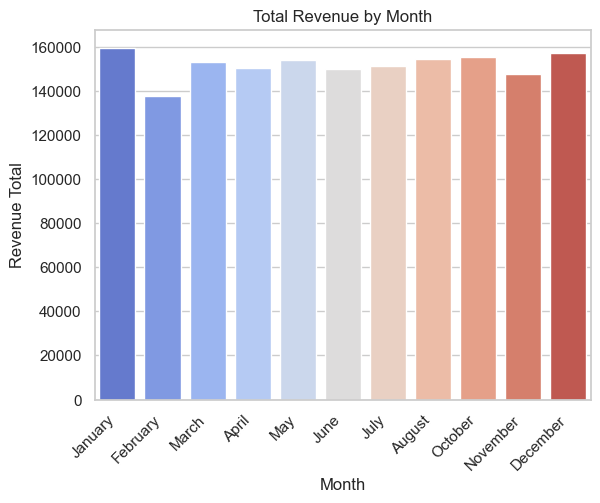

In [207]:
sns.barplot(x='Month', y='Revenue_Total',hue='Month', data=grouped_months, palette='coolwarm')
plt.xticks(rotation=45, ha='right') 
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue Total')

### Insights:
    The graph shows that January and December are the months with the highest purchasing activity, while February has the lowest.
    This may be due to holidays, discounts, and offers in January and December, which increase purchases.
    In contrast, February may mark the end of holiday periods.
    To address this, the website can make promotions and offers during February to boost purchasing activity.

----------------------------------

### ❓ 5.Which category (subscribed or not subscribed) uses more vouchers?


### 🎟️ Subscribtion and voucher barplot

In [208]:
Newsletter_mapping = {
    0: 'Not Subscribed',
    1: 'Subscribed'
}
df['Newsletter']= df['Newsletter'].map(Newsletter_mapping)
Subscribtion=df.groupby('Newsletter')['Voucher'].sum().reset_index()
Subscribtion
#voucher_Usage = df.groupby('Voucher').size().reset_index(name="Count")



,Newsletter,Voucher
0,Not Subscribed,13914.0
1,Subscribed,2527.0


Text(0, 0.5, 'Vouchers used')

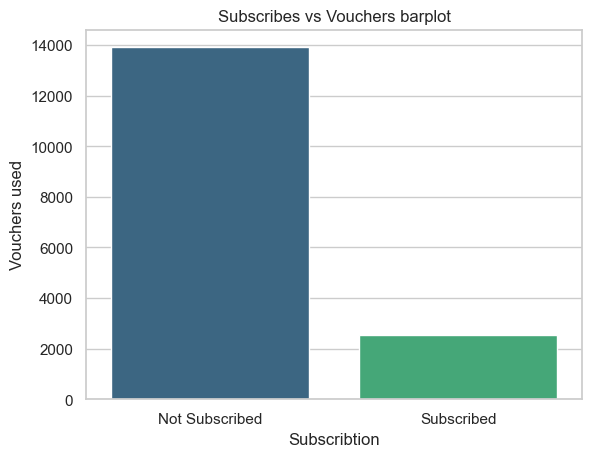

In [209]:
sns.barplot(x='Newsletter', y='Voucher',hue='Newsletter', data= Subscribtion, palette='viridis')
plt.title('Subscribes vs Vouchers barplot')
plt.xlabel('Subscribtion')
plt.ylabel('Vouchers used')

### Insights:
    From this graph not subscribed category is higher in using vouchers so the website can provide a 
    limited number of vouchers that can be used for the not subscribed users.Another decision can be made as a 
    Highly likely hypothesis that these users just use vouchers for the website and not subscribing so the website 
    can make vouchers only for the subscribing users.

-----------------------------------------------------------------------

### ❓ 6. What is The Most Browser Used To Acess the Website?

### 🥧 Pie Chart of Percentage of each Browser used

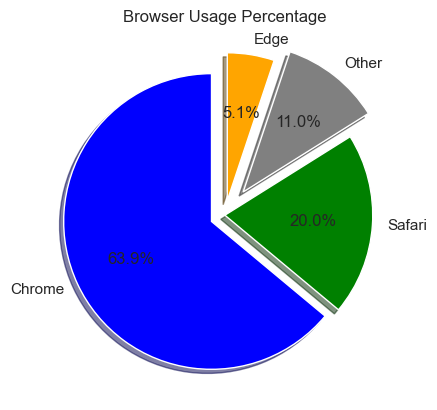

In [228]:
labels = ['Chrome', 'Safari', 'Other', 'Edge']
element = df['Browser'].value_counts()  
colors = ['blue', 'green', 'gray', 'orange'] 

# Define explode values
explode = (0.1, 0, 0.2, 0.1)  # Chrome, Safari, Other, Edge

plt.pie(
    element,
    labels=labels,
    explode=explode,
    colors=colors,
    startangle=90,
    shadow=True,
    autopct='%1.1f%%'
)
plt.title("Browser Usage Percentage")
plt.show()

### Insights:
     Chrome is the dominant browser for the users.so the site can make more advertisements as it can make the most effect on Chrome users and other Google-related applications. 


--------------------------------------

### ❓ 7.Which Age Range Has the Highest Revenue Total?

### 🌳 Treemap of Revenue Total of each Age Category

(0.0, 100.0, 0.0, 100.0)

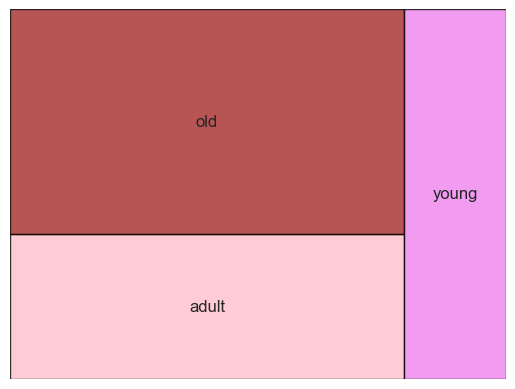

In [211]:
# at this graph cataorized age to 3 cateogry to show which one has more salary at website
def range(age=df['Age']):
    if 10 <= age <= 25:
          return'young'
    elif 26 <= age <= 40:
          return 'adult'
    elif 41<= age <= 70:
         return 'old'
    
category=df[['Age','Revenue_Total']].copy()
category['Category'] = category['Age'].apply(range)

category=category.groupby('Category')['Revenue_Total'].sum().reset_index()
category
colors=['pink','brown','violet']
squarify.plot(sizes=category['Revenue_Total'],label=category['Category'],alpha=0.8,color=colors, linewidth=1, edgecolor='black')



plt.axis('off')


### Insights:
        From this graph, old age has the highest revenue total. so the site can make more offers and discounts to attract young age to increase the sales for the young. while continue focusing on the old age as it's clearly the targeted audience

--------------

### ❓ 8.Which age Range Spends The Most time Shopping at The Website?

### 🌴 Treemap of Time Spent on the website for every Age Category

(0.0, 100.0, 0.0, 100.0)

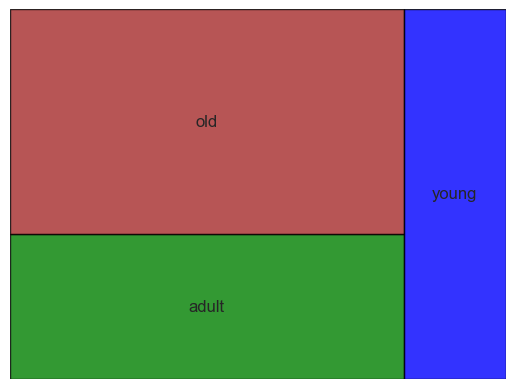

In [212]:
# this graph represnt the time sprnding at web site
# from the two previou graph we can deduce that when client spend more time at site he purchase more
category=df[['Age','Time_Spent']].copy()
category['Category'] = category['Age'].apply(range)

category=category.groupby('Category')['Time_Spent'].sum().reset_index()
category
colors=['green','brown','blue']
squarify.plot(sizes=category['Time_Spent'],label=category['Category'],alpha=0.8,color=colors, linewidth=1, edgecolor='black')



plt.axis('off')


### Insights:
     So old age range is dominant in time spending and revenue total so the site can offer more products 
     for older ages to spend more time as more products can be bought.

---------------------

### ❓ 9.What is The Percentage of Subscribed Users?

### Pie Chart for the Percentage of Subscribtion to the website

In [229]:
import plotly.express as px
import pandas as pd

# Example data
labels = ["not subscribed", "subscribed"]
element = df["Newsletter"].value_counts()  # Replace with your DataFrame data

# Create a DataFrame for Plotly
pie_data = pd.DataFrame({'Status': labels, 'Count': element})

# Create an interactive pie chart
fig = px.pie(
    pie_data,
    names='Status',  # Column with labels
    values='Count',  # Column with values
    color='Status',  # Optional: Color segments
    color_discrete_map={'not subscribed': 'skyblue', 'subscribed': 'violet'},  # Custom colors
    title="Ratio Between Subscribed and New Clients"
)

# Customize hover information
fig.update_traces(
    hoverinfo='label+percent+value',  # Show label, percentage, and value on hover
    textinfo='percent',              # Show percentage on the chart
    pull=[0.1, 0]                    # Explode only the first slice
)

# Show the chart
fig.show()


### Insights:
    This pie plot shows that the unsubscribed users have a greater percentage (84.9%) so the site can make discounts just for the 
    people who are subscribed to the newsletter which will increase the percentage of subscribers.

---------------------------

### ❓ 10.Which Gender Has More Revenue Total (Spends the Most)?


### 📊 Bar Chart of the Revenue total for each Gender

In [214]:
gender_salary = df.groupby('Gender')['Revenue_Total'].sum().reset_index()
n=pd.DataFrame(gender_salary)
n.head()


,Gender,Revenue_Total
0,0.0,599529.9
1,1.0,1222509.8


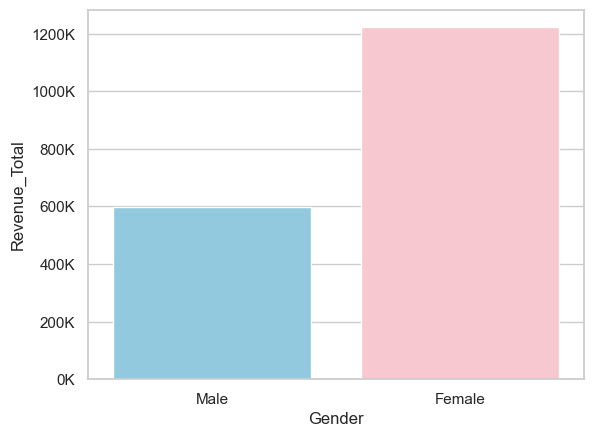

In [215]:
# this graph show different of total salary according to gender
n['Gender'] = n['Gender'].replace({0.0: 'Male', 1.0: 'Female'})
def format_y(value, tick_number):
    return f'{int(value/1000)}K'
sns.set_theme(style="whitegrid")
palette=['skyblue','pink']
#palette = sns.color_palette("pastel", 2)
ax= sns.barplot(x='Gender', y='Revenue_Total',hue = 'Gender', data=n, palette=palette)
ax.yaxis.set_major_formatter(FuncFormatter(format_y))

### Insights: 
    The bar plot shows that the female’s total revenue is greater than the male’s.so the website can offer more discounts on male products 
    and increase the products for females as their total purchase is high.

---------------------------------

### ❓11. Segmentation of the customers to define the targeted groups

### 📈 RFM Analysis 

In [216]:
df['year'] = df['year'].apply(lambda x: 2000 + x)
rfm = df[['year', 'month', 'day', 'N_Purchases']].copy()
rfm['date'] = pd.to_datetime(rfm[['year', 'month', 'day']])
current_date = datetime.now()
rfm['Recency'] = (current_date - rfm['date']).dt.days
rfm['Frequency'] = df['N_Purchases']
rfm['Monetary'] = df['Revenue_Total']
rfm.head()


,year,month,day,N_Purchases,date,Recency,Frequency,Monetary
0,2021,6,22,2.0,2021-06-22,1275,2.0,45.3
1,2021,12,10,3.0,2021-12-10,1104,3.0,36.2
2,2021,3,14,1.0,2021-03-14,1375,1.0,10.6
3,2021,10,25,5.0,2021-10-25,1150,5.0,54.1
4,2021,9,14,1.0,2021-09-14,1191,1.0,56.9


In [217]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,year,month,day,N_Purchases,date,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
0,2021,6,22,2.0,2021-06-22,1275,2.0,45.3,3,4,1
1,2021,12,10,3.0,2021-12-10,1104,3.0,36.2,1,3,2
2,2021,3,14,1.0,2021-03-14,1375,1.0,10.6,4,4,4
3,2021,10,25,5.0,2021-10-25,1150,5.0,54.1,1,2,1
4,2021,9,14,1.0,2021-09-14,1191,1.0,56.9,2,4,1


In [218]:
rfm["RFM_Score"] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,year,month,day,N_Purchases,date,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,2021,6,22,2.0,2021-06-22,1275,2.0,45.3,3,4,1,341
1,2021,12,10,3.0,2021-12-10,1104,3.0,36.2,1,3,2,132
2,2021,3,14,1.0,2021-03-14,1375,1.0,10.6,4,4,4,444
3,2021,10,25,5.0,2021-10-25,1150,5.0,54.1,1,2,1,121
4,2021,9,14,1.0,2021-09-14,1191,1.0,56.9,2,4,1,241


In [219]:
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary',ascending=False).head()

,year,month,day,N_Purchases,date,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
822,2021,12,31,7.0,2021-12-31,1083,7.0,59.9,1,1,1,111
25864,2021,10,30,7.0,2021-10-30,1145,7.0,59.9,1,1,1,111
6627,2021,10,14,7.0,2021-10-14,1161,7.0,59.9,1,1,1,111
21089,2021,11,26,7.0,2021-11-26,1118,7.0,59.9,1,1,1,111
59101,2021,11,29,7.0,2021-11-29,1115,7.0,59.7,1,1,1,111


In [220]:
rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.head()

,year,month,day,N_Purchases,date,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Value_Segment
0,2021,6,22,2.0,2021-06-22,1275,2.0,45.3,3,4,1,341,Low-Value
1,2021,12,10,3.0,2021-12-10,1104,3.0,36.2,1,3,2,132,High-Value
2,2021,3,14,1.0,2021-03-14,1375,1.0,10.6,4,4,4,444,Low-Value
3,2021,10,25,5.0,2021-10-25,1150,5.0,54.1,1,2,1,121,High-Value
4,2021,9,14,1.0,2021-09-14,1191,1.0,56.9,2,4,1,241,Mid-Value


### plot for the rfm model

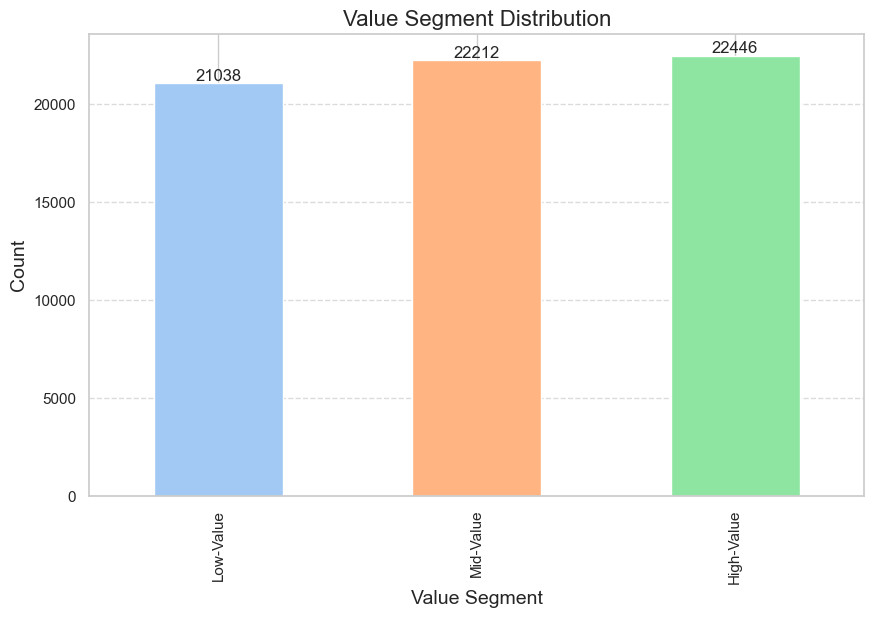

In [221]:
plt.figure(figsize=(10, 6)) # Set the figure size
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16) 
ax.set_xlabel('Value Segment', fontsize=14) 
ax.set_ylabel('Count', fontsize=14) 
ax.grid(axis='y', linestyle='--', alpha=0.7) 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',

(p.get_x() + p.get_width() / 2., p.get_height()),
ha='center', va='bottom', fontsize=12)
plt.show()

### Insights:
    From this graph, the high-value segmentation customers are the dominant but the low value is still high so the website can make surveys 
    to rate the website services and to allow users to make comments to improve the services of the website.